# MLE vs MSM analysis

In this notebook we compare the results of the estimation experiments.

For each scenario, we repeated the simulations varying $T$, edge_per_t, $\epsilon$, $\mu$.
For each experiment we estimate $\epsilon$ with MSM and MLE.

In [2]:
import sys
sys.path += ["../src"]

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LogNorm, Normalize
import repeat_function
from matplotlib.patches import Patch

In [3]:
simple_bc_sim = pd.read_csv("../data/compare_simple_bc_230805.csv")
pos_obs_sim = pd.read_csv("../data/compare_pos_bc_230805.csv")
evidences_sim = pd.read_csv("../data/compare_evidences_bc_230805.csv")

We performed 120 experiments for each configuration of edge_per_t - T

In [14]:
simple_bc_sim.groupby(["edge_per_t", "T"]).count()["epsilon_msm"].unstack()

T,16,32,64,128,256,512
edge_per_t,,,,,,
1,120,120,120,120,120,120
4,120,120,120,120,120,120
16,120,120,120,120,120,120
64,120,120,120,120,120,120


In [4]:
sns.set_style("whitegrid")
#plt.style.use('seaborn')

palette = sns.color_palette("Set2")

In [5]:
blue, red, green, *_ = sns.color_palette()

sns.set_palette(sns.color_palette())

In [6]:
model_names = ["Fully observed", "Partially observed ", "Noisy observations"]
models = [simple_bc_sim, pos_obs_sim, evidences_sim]
short_model_names = ["BCM-F", "BCM-P", "BCM-N"]

In [7]:
methods_names = ["Likelihood-based", "Simulation-based"]

In [8]:
cond = "(T > 16)&(edge_per_t > 1)"

In [9]:
patches = [Patch(color = sns.color_palette()[i], label = methods_names[i]) for i in range(2)]

In [10]:
len(evidences_sim)

8640

# Epsilon estimated vs real

### FBCM 

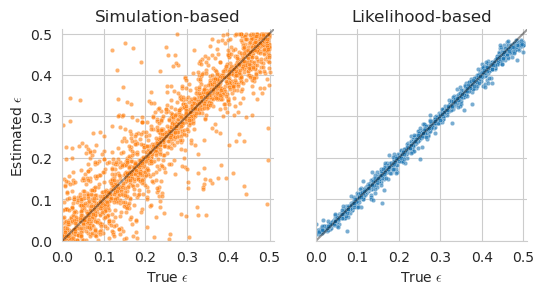

In [15]:
plt.rcParams["mathtext.fontset"] = "cm"

fig, axes = plt.subplots(ncols = 2, nrows = 1, figsize = (6, 3), sharey = True)

max_x = 0.51

axes[0].set_ylabel("Estimated $\epsilon$")

for i, var, title in zip([1,0], ["epsilon_pgabm", "epsilon_msm"], methods_names):
    ax = axes[i]
    ax.margins(x=0, y=0)
    
    ax.plot([0,max_x], [0,max_x], c = "k", alpha = 0.4)
    ax.set_xlim(0,max_x)
    ax.set_ylim(0,max_x)
    ax.axis("square")
    ax.set_xlabel("True $\epsilon$")
    
    ax.set_title(title)
    
    ax.set_xticks(np.arange(0, 0.51, 0.1))
    ax.set_yticks(np.arange(0, 0.51, 0.1))

    
    sns.scatterplot(data = simple_bc_sim.query(cond),
    #sns.scatterplot(data = simple_bc_sim, 
                    x = "real_epsilon", y = var, s = 10, alpha = 0.6,
                    ax = ax, color = sns.color_palette()[np.abs(i -  1)])


sns.despine()

#fig.savefig("../paper/fig/scatterplot_epsilon_simple_230809.pdf", format = "pdf", bbox_inches = "tight")
#fig.savefig("../paper/fig/scatterplot_epsilon_simple_230809.png", format = "png", bbox_inches = "tight")

### PBCM

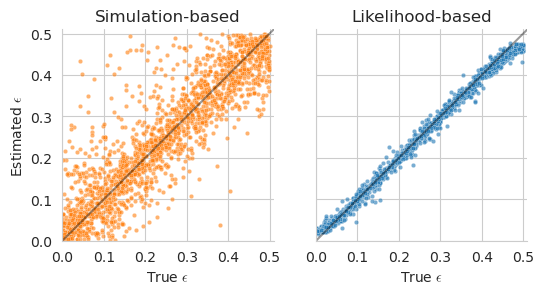

In [16]:
plt.rcParams["mathtext.fontset"] = "cm"

fig, axes = plt.subplots(ncols = 2, nrows = 1, figsize = (6, 3), sharey = True)

max_x = 0.51

axes[0].set_ylabel("Estimated $\epsilon$")

for i, var, title in zip([1,0], ["epsilon_pgabm", "epsilon_msm"], methods_names):
    ax = axes[i]
    ax.margins(x=0, y=0)
    
    ax.plot([0,max_x], [0,max_x], c = "k", alpha = 0.4)
    ax.set_xlim(0,max_x)
    ax.set_ylim(0,max_x)
    ax.axis("square")
    ax.set_xlabel("True $\epsilon$")
    
    ax.set_title(title)
    
    ax.set_xticks(np.arange(0, 0.51, 0.1))
    ax.set_yticks(np.arange(0, 0.51, 0.1))

    
    sns.scatterplot(data = pos_obs_sim.query(cond),
    #sns.scatterplot(data = pos_obs_sim, 
                    x = "real_epsilon", y = var, s = 10, alpha = 0.6,
                    ax = ax, color = sns.color_palette()[np.abs(i -  1)])


sns.despine()

#fig.savefig("../paper/fig/scatterplot_epsilon_pos_obs_230809.pdf", format = "pdf", bbox_inches = "tight")
#fig.savefig("../paper/fig/scatterplot_epsilon_pos_obs_230809.png", format = "png", bbox_inches = "tight")

### NBCM

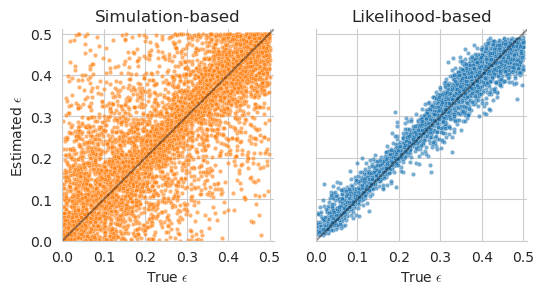

In [17]:
plt.rcParams["mathtext.fontset"] = "cm"

fig, axes = plt.subplots(ncols = 2, nrows = 1, figsize = (6, 3), sharey = True)

max_x = 0.51

axes[0].set_ylabel("Estimated $\epsilon$")

for i, var, title in zip([1,0], ["epsilon_pgabm", "epsilon_msm"], methods_names):
    ax = axes[i]
    ax.margins(x=0, y=0)
    
    ax.plot([0,max_x], [0,max_x], c = "k", alpha = 0.4)
    ax.set_xlim(0,max_x)
    ax.set_ylim(0,max_x)
    ax.axis("square")
    ax.set_xlabel("True $\epsilon$")
    
    ax.set_title(title)
    
    ax.set_xticks(np.arange(0, 0.51, 0.1))
    ax.set_yticks(np.arange(0, 0.51, 0.1))

    
    sns.scatterplot(data = evidences_sim.query(cond),
    #sns.scatterplot(data = evidences_sim, 
                    x = "real_epsilon", y = var, s = 10, alpha = 0.6,
                    ax = ax, color = sns.color_palette()[np.abs(i -  1)])


sns.despine()

#fig.savefig("../paper/fig/scatterplot_epsilon_evidences_230809.pdf", format = "pdf", bbox_inches = "tight")
#fig.savefig("../paper/fig/scatterplot_epsilon_evidences_230809.png", format = "png", bbox_inches = "tight")

## Error epsilon

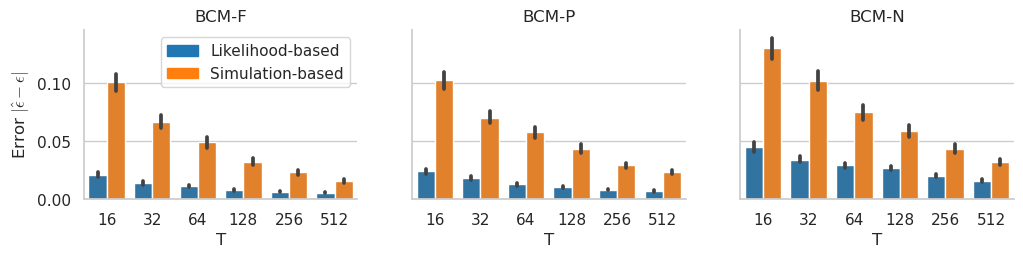

In [18]:
plt.rcParams["mathtext.fontset"] = "cm"
dist_eps_string = r"Error $\vert \hat{\epsilon} - \epsilon \vert$"

sns.set_context("notebook")

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (12, 2.2), sharey = True)

for ax, model, model_name in zip(axes, [simple_bc_sim, pos_obs_sim, evidences_sim.query("evidences_per_t == 4")], 
                                 short_model_names):
    sns.barplot(data = model.set_index(["T", "edge_per_t"])[["abs_error_pgabm", "abs_error_msm"]]\
    #sns.barplot(data = model.set_index(["T", "edge_per_t"]).query(cond)[["abs_error_pgabm", "abs_error_msm"]]\
                .rename(columns = {"abs_error_pgabm": "pgabm", "abs_error_msm": "msm"}).stack().reset_index()\
                .rename(columns = {"level_2": "method", 0: "abs_error"}), 
                x = "T", y = "abs_error", 
                hue = "method", 
                errorbar = ("ci", 95),
                ax = ax
               )
    ax.set_title(model_name)       
    if ax == axes[0]:
        ax.legend(handles = patches, loc = "upper right")
    else:
        ax.legend([],[], frameon = False)
    ax.set_ylabel(dist_eps_string if ax == axes[0] else "")


sns.despine()


#fig.savefig("../paper/fig/barplot_shortnames_abs_error_T_methods_230809.pdf", format = "pdf", bbox_inches = "tight")
#fig.savefig("../paper/fig/barplot_shortnames_abs_error_T_methods_230809.png", format = "png", bbox_inches = "tight")


### Edge per t

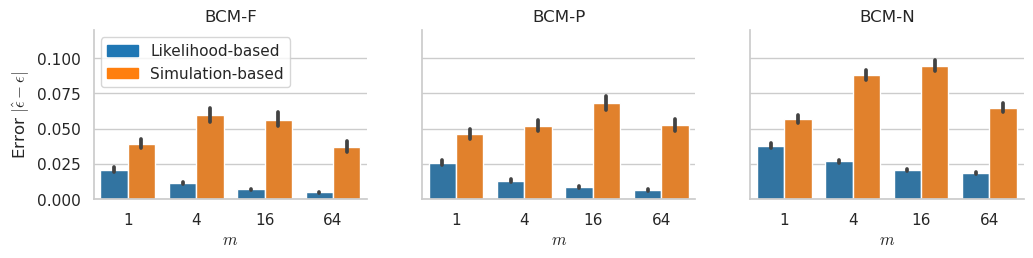

In [19]:
dist_eps_string = r"Error $\vert \hat{\epsilon} - \epsilon \vert$"

sns.set_context("notebook")

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (12, 2.2), sharey = True)

for ax, model, model_name in zip(axes, [simple_bc_sim, pos_obs_sim, evidences_sim], short_model_names):
    #sns.barplot(data = model.query(cond).set_index(["T", "edge_per_t"])[["abs_error_pgabm", "abs_error_msm"]]\
    sns.barplot(data = model.set_index(["T", "edge_per_t"])[["abs_error_pgabm", "abs_error_msm"]]\
                .rename(columns = {"abs_error_pgabm": "pgabm", "abs_error_msm": "msm"}).stack().reset_index()\
                .rename(columns = {"level_2": "method", 0: "abs_error"}), 
                x = "edge_per_t", y = "abs_error", 
                hue = "method", 
                errorbar = ("ci", 95),
                ax = ax
               )
    ax.set_title(model_name)       
    if ax == axes[0]:
        ax.legend(handles = patches, loc = "upper left")
    else:
        ax.legend([],[], frameon = False)
    ax.set_ylabel(dist_eps_string if ax == axes[0] else "")
    ax.set_xlabel("$m$")
    ax.set_ylim(0,0.12)


sns.despine()


#fig.savefig("../paper/fig/barplot_shortnames_abs_error_methods_edge_per_t_230809.pdf", format = "pdf", bbox_inches = "tight")
#fig.savefig("../paper/fig/barplot_shortnames_abs_error_methods_edge_per_t_230809.png", format = "png", bbox_inches = "tight")


### Evidences per t

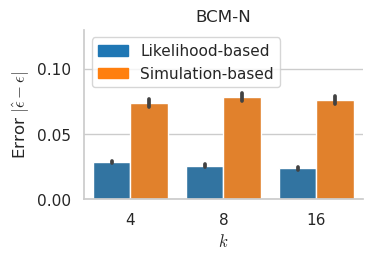

In [20]:
plt.rcParams["mathtext.fontset"] = "cm"
dist_eps_string = r"Error $\vert \hat{\epsilon} - \epsilon \vert$"

sns.set_context("notebook")

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (3.6, 2.2), sharey = True)

for model, model_name in zip([evidences_sim], [short_model_names[-1]]):
#    sns.barplot(data = model.query(cond).set_index(["T", "evidences_per_t"])[["abs_error_pgabm", "abs_error_msm"]]\
    sns.barplot(data = model.set_index(["T", "evidences_per_t"])[["abs_error_pgabm", "abs_error_msm"]]\
                .rename(columns = {"abs_error_pgabm": "pgabm", "abs_error_msm": "msm"}).stack().reset_index()\
                .rename(columns = {"level_2": "method", 0: "abs_error"}), 
                x = "evidences_per_t", y = "abs_error", 
                hue = "method", 
                errorbar = ("ci", 95),
                ax = ax
               )
    ax.set_title(model_name)       
    ax.set_xlabel("$k$")

    ax.legend(handles = patches, loc = "upper left")
    
    ax.set_ylabel(dist_eps_string)
    ax.set_ylim(0, 0.13)


sns.despine()


#fig.savefig("../paper/fig/barplot_shortnames_abs_error_methods_evidences_per_t_230809.pdf", format = "pdf", bbox_inches = "tight")
#fig.savefig("../paper/fig/barplot_shortnames_abs_error_methods_evidences_per_t_230809.png", format = "png", bbox_inches = "tight")


In [21]:
for model, model_name in zip([simple_bc_sim, pos_obs_sim, evidences_sim], model_names):
    print(model_name)
    print("Average error pgabm", round(model.mean()["abs_error_pgabm"], 3))
    print("Average error MSM", round(model.mean()["abs_error_msm"], 3))
    print("Average error ratio", round(model.mean()["abs_error_msm"] / model.mean()["abs_error_pgabm"], 3))
    print("")
    

Fully observed
Average error pgabm 0.011
Average error MSM 0.048
Average error ratio 4.33

Partially observed 
Average error pgabm 0.014
Average error MSM 0.055
Average error ratio 4.027

Noisy observations
Average error pgabm 0.026
Average error MSM 0.076
Average error ratio 2.92



In [22]:
for model, model_name in zip([simple_bc_sim, pos_obs_sim, evidences_sim, pd.concat([simple_bc_sim, pos_obs_sim, evidences_sim])],
                             model_names + ["Aggregate"]):
    print(model_name)
    print("Average error pgabm", round(model.median()["abs_error_pgabm"], 3))
    print("Average error MSM", round(model.median()["abs_error_msm"], 3))
    print("Average error ratio", round(model.assign(ratio_error = lambda x: x["abs_error_msm"] / x["abs_error_pgabm"]).median()["ratio_error"], 3))
    print("")
    

Fully observed
Average error pgabm 0.006
Average error MSM 0.027
Average error ratio 3.963

Partially observed 
Average error pgabm 0.008
Average error MSM 0.036
Average error ratio 4.412

Noisy observations
Average error pgabm 0.018
Average error MSM 0.047
Average error ratio 2.6

Aggregate
Average error pgabm 0.013
Average error MSM 0.04
Average error ratio 3.121



## Time

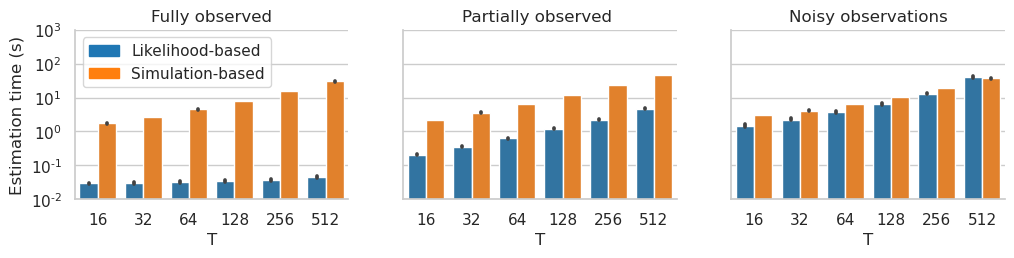

In [23]:
plt.rcParams["mathtext.fontset"] = "cm"

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (12, 2.2), sharey = True)

for ax, model, model_name in zip(axes, [simple_bc_sim, pos_obs_sim, evidences_sim],model_names):
    sns.barplot(data = model.set_index(["T", "edge_per_t"])[["time_pgabm", "time_msm"]]\
                .rename(columns = {"time_pgabm": "pgabm", "time_msm": "msm"}).stack().reset_index()\
                .rename(columns = {"level_2": "method", 0: "time"}), 
                x = "T", y = "time", 
                hue = "method", 
                errorbar = ("ci", 95),
                ax = ax
               )
    ax.set_title(model_name)  
    ax.set_yscale("log")
    if ax == axes[0]:
        ax.legend(handles = patches, loc = "upper left")
    else:
        ax.legend([],[], frameon = False)
    ax.set_ylim(10**-2,10**3)
    ax.set_ylabel("Estimation time (s)" if ax == axes[0] else "")

sns.despine()

#fig.savefig("../paper/fig/barplot_time_methods_230809.pdf", format = "pdf", bbox_inches = "tight")
#fig.savefig("../paper/fig/barplot_time_methods_230809.png", format = "png", bbox_inches = "tight")

In [24]:
for model, model_name in zip([simple_bc_sim, pos_obs_sim, evidences_sim, pd.concat([simple_bc_sim, pos_obs_sim, evidences_sim])], 
                             model_names + ["Aggregate"]):
    print(model_name)
    print("Average time pgabm", round(model.median()["time_pgabm"], 3))
    print("Average time MSM", round(model.median()["time_msm"], 3))
    print("Average time ratio", round(model.assign(ratio_time = lambda x: x["time_msm"] / x["time_pgabm"]).median()["ratio_time"], 3))
    print("")
    

Fully observed
Average time pgabm 0.027
Average time MSM 6.117
Average time ratio 207.011

Partially observed 
Average time pgabm 0.865
Average time MSM 10.401
Average time ratio 11.856

Noisy observations
Average time pgabm 4.434
Average time MSM 8.957
Average time ratio 2.171

Aggregate
Average time pgabm 1.724
Average time MSM 7.531
Average time ratio 3.927



## Distribution R2 X0

In [25]:
evidences_sim[["edge_per_t", "T", "evidences_per_t", "X0_r2", "abs_error_msm", "abs_error_pgabm"]].corr()[["X0_r2", "abs_error_pgabm"]]

,X0_r2,abs_error_pgabm
edge_per_t,-0.057467,-0.196138
T,0.339324,-0.304685
evidences_per_t,0.264074,-0.069211
X0_r2,1.000000,-0.356542
abs_error_msm,-0.173878,0.114081
abs_error_pgabm,-0.356542,1.000000


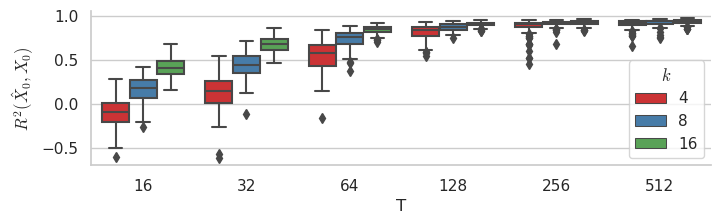

In [26]:
plt.rcParams["mathtext.fontset"] = "cm"

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8, 2), sharey = True)

   
sns.boxplot(data = evidences_sim.query("edge_per_t == 4"),
            x = "T", y = "X0_r2",
            hue = "evidences_per_t", palette = "Set1")
axes.legend(title = "$k$",loc = "lower right")
axes.set_ylabel("$R^2(\hat{X}_0, X_0)$")
    
    

sns.despine()

#fig.savefig("../paper/fig/boxplot_R2_X0_230809.pdf", format = "pdf", bbox_inches = "tight")
#fig.savefig("../paper/fig/boxplot_R2_X0_230809.png", format = "png", bbox_inches = "tight")


In [27]:
evidences_sim.query("(edge_per_t == 4)&(T > 64)")["X0_r2"].median()

0.9119050204753876

### Mean and Quartiles

In [28]:
simple_bc_sim.apply(lambda x: pd.Series([x.mean(), x.quantile(0.25), x.quantile(0.5), x.quantile(0.75)], 
                                        index = ["mean", "25 percentile", "50 percentile", "75 percentile"]))\
[["abs_error_msm", "time_msm", "abs_error_pgabm", "time_pgabm"]]

,abs_error_msm,time_msm,abs_error_pgabm,time_pgabm
mean,0.048061,10.377291,0.011100,0.034726
25 percentile,0.009878,2.484164,0.002573,0.019185
50 percentile,0.026727,6.117428,0.006395,0.027162
75 percentile,0.062490,14.602521,0.014042,0.042824


In [29]:
pos_obs_sim.apply(lambda x: pd.Series([x.mean(), x.quantile(0.25), x.quantile(0.5), x.quantile(0.75)], 
                                        index = ["mean", "25 percentile", "50 percentile", "75 percentile"]))\
[["abs_error_msm", "time_msm", "abs_error_pgabm", "time_pgabm"]]

,abs_error_msm,time_msm,abs_error_pgabm,time_pgabm
mean,0.054603,15.584042,0.013558,1.551764
25 percentile,0.015659,3.459739,0.003121,0.333208
50 percentile,0.035773,10.400869,0.008084,0.864789
75 percentile,0.071893,22.469165,0.017874,2.035088


In [30]:
evidences_sim.apply(lambda x: pd.Series([x.mean(), x.quantile(0.25), x.quantile(0.5), x.quantile(0.75)], 
                                        index = ["mean", "25 percentile", "50 percentile", "75 percentile"]))\
[["abs_error_msm", "time_msm", "abs_error_pgabm", "time_pgabm", "X0_r2", "X0_mae", "X0_mse"]]

,abs_error_msm,time_msm,abs_error_pgabm,time_pgabm,X0_r2,X0_mae,X0_mse
mean,0.076051,13.361406,0.026044,11.393785,0.639102,0.129720,0.040005
25 percentile,0.019699,3.962429,0.008706,1.504294,0.497468,0.073833,0.008985
50 percentile,0.047016,8.957495,0.017747,4.434333,0.811211,0.097992,0.018721
75 percentile,0.105571,18.774258,0.033870,11.611795,0.907923,0.162488,0.052455
